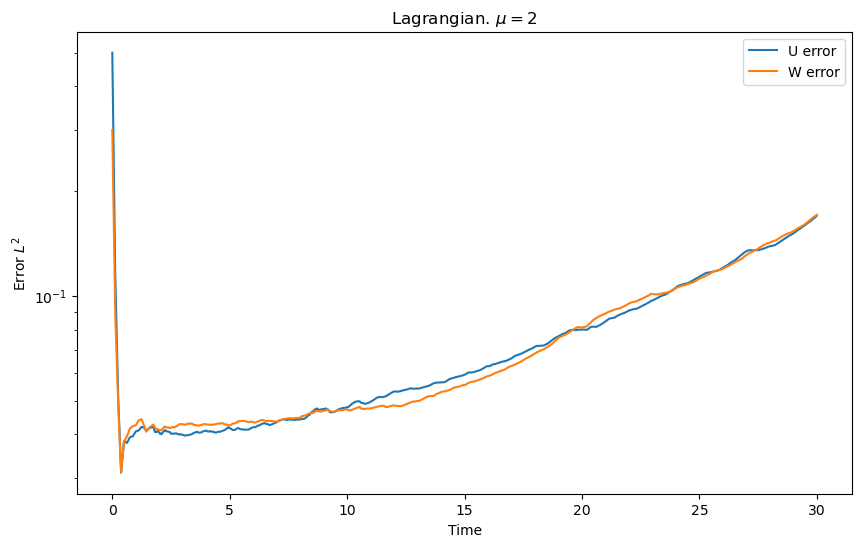

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
file = "n1"

time = np.load(f'lagrangian_creeps/plots/{file}/epochs.npy')
u_error = np.load(f'lagrangian_creeps/plots/{file}/rbErrors.npy')
w_error = np.load(f'lagrangian_creeps/plots/{file}/wbErrors.npy')


plt.figure(figsize=(10, 6))
plt.semilogy(time, u_error, label='U error')
plt.semilogy(time, w_error, label='W error')
plt.xlabel('Time')

plt.ylabel('Error $L^2$')
plt.title(r'Lagrangian. $\mu=2$')
plt.legend()
plt.show()

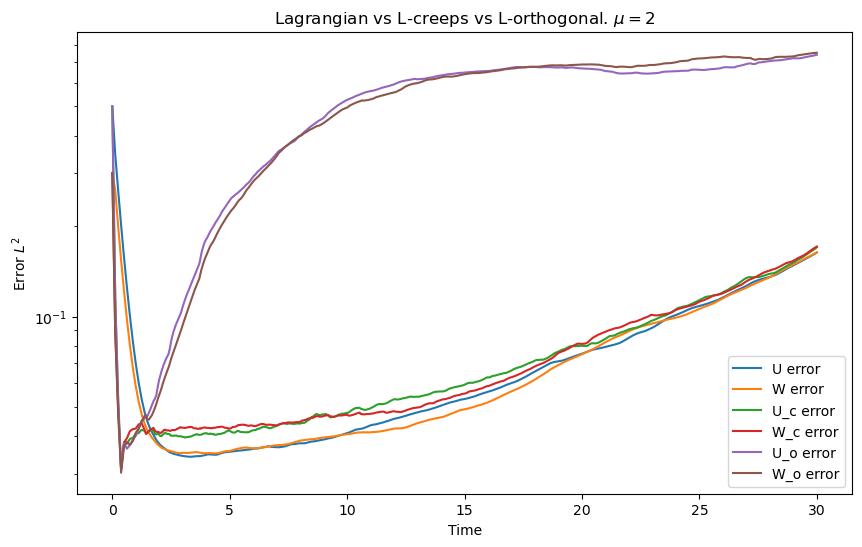

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
file = "n1"

time = np.load(f'lagrangian/plots/{file}.3/epochs.npy')
u_error = np.load(f'lagrangian/plots/{file}.3/rbErrors.npy')
w_error = np.load(f'lagrangian/plots/{file}.3/wbErrors.npy')

u_error_c = np.load(f'lagrangian_creeps/plots/{file}/rbErrors.npy')
w_error_c = np.load(f'lagrangian_creeps/plots/{file}/wbErrors.npy')

u_error_o = np.load(f'lagrangian_orthogonal/plots/{file}/rbErrors.npy')
w_error_o = np.load(f'lagrangian_orthogonal/plots/{file}/wbErrors.npy')

plt.figure(figsize=(10, 6))
plt.semilogy(time, u_error, label='U error')
plt.semilogy(time, w_error, label='W error')
plt.semilogy(time[:2795], u_error_c, label='U_c error')
plt.semilogy(time[:2795], w_error_c, label='W_c error')
plt.semilogy(time[:2795], u_error_o, label='U_o error')
plt.semilogy(time[:2795], w_error_o, label='W_o error')
plt.xlabel('Time')

plt.ylabel('Error $L^2$')
plt.title(r'Lagrangian vs L-creeps vs L-orthogonal. $\mu=2$')
plt.legend()
plt.savefig('5n_sensors.png')
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
file = "n3"

time = np.load(f'eulerian/plots/{file}/epochs.npy')
u_error = np.load(f'eulerian/plots/{file}/rbErrors.npy')
w_error = np.load(f'eulerian/plots/{file}/wbErrors.npy')

# time = np.load(f'eulerian_creeps/plots/{file}/epochs.npy')
u_error_c = np.load(f'eulerian_creeps/plots/{file}/rbErrors.npy')
w_error_c = np.load(f'eulerian_creeps/plots/{file}/wbErrors.npy')

u_error_c_small = np.load(f'eulerian_creeps/plots/{file}.001/rbErrors.npy')
w_error_c_small = np.load(f'eulerian_creeps/plots/{file}.001/wbErrors.npy')

u_error_c_10 = np.load(f'eulerian_creeps/plots/{file}.10/rbErrors.npy')
w_error_c_10 = np.load(f'eulerian_creeps/plots/{file}.10/wbErrors.npy')

# time_l = np.load(f'lagrangian/plots/{file}/epochs.npy')
# u_error_l = np.load(f'lagrangian/plots/{file}/rbErrors.npy')
# w_error_l = np.load(f'lagrangian/plots/{file}/wbErrors.npy')
# u_error_l = np.nan_to_num(u_error_l, nan=10e130, posinf=10e130)
# w_error_l = np.nan_to_num(w_error_l, nan=10e130, posinf=10e130)

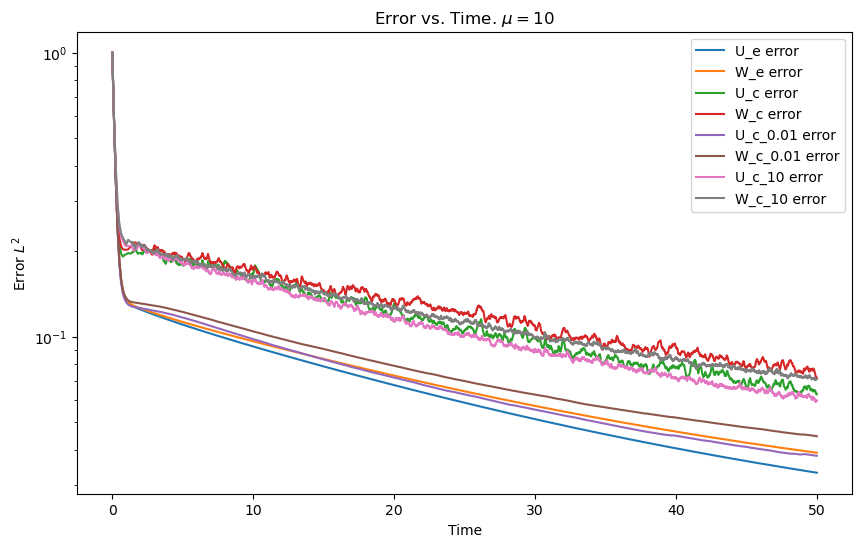

In [7]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.semilogy(time, u_error, label='U_e error')
plt.semilogy(time, w_error, label='W_e error')
plt.semilogy(time, u_error_c, label='U_c error')
plt.semilogy(time, w_error_c, label='W_c error')
plt.semilogy(time, u_error_c_small, label='U_c_0.01 error')
plt.semilogy(time, w_error_c_small, label='W_c_0.01 error')
plt.semilogy(time, u_error_c_10, label='U_c_10 error')
plt.semilogy(time, w_error_c_10, label='W_c_10 error')
# plt.semilogy(time_l, u_error_l, label='U_l error')
# plt.semilogy(time_l, w_error_l, label='W_l error')
plt.xlabel('Time')
plt.ylabel('Error $L^2$')
plt.title(r'Error vs. Time. $\mu=10$')
plt.legend()
plt.savefig('5n_sensors.png')
# plt.grid(True)
plt.show()

In [78]:
import numpy as np
from scipy.interpolate import interp2d

def periodic_interp2d(x, y, z, xi, yi, kx=3, ky=3):
    """
    Perform 2D periodic interpolation.
    
    Parameters:
    x, y: 1D arrays of coordinates
    z: 2D array of values to interpolate
    xi, yi: Points to interpolate at
    kx, ky: Degrees of spline interpolation
    
    Returns:
    Interpolated values at (xi, yi)
    """
    # Extend the input data to handle periodicity
    x_ext = np.concatenate([x[-1:] - (x[-1] - x[0]), x, x[:1] + (x[-1] - x[0])])
    y_ext = np.concatenate([y[-1:] - (y[-1] - y[0]), y, y[:1] + (y[-1] - y[0])])
    z_ext = np.vstack([z[-1:], z, z[:1]])
    z_ext = np.hstack([z_ext[:,-1:], z_ext, z_ext[:,:1]])
    
    # Create the interpolation function
    interp_func = interp2d(x_ext, y_ext, z_ext, kind='cubic')
    
    # Wrap the interpolation to enforce periodic boundaries
    def wrapped_interp(xi, yi):
        xi_wrapped = xi % (x[-1] - x[0])
        yi_wrapped = yi % (y[-1] - y[0])
        return interp_func(xi_wrapped, yi_wrapped)
    
    # Interpolate at the given points
    return wrapped_interp(xi, yi)

# Create sample data
x = np.linspace(0, 2*np.pi, 10)
y = np.linspace(0, 2*np.pi, 10)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

# Points to interpolate at
xi = np.linspace(0, 3*np.pi, 100)
yi = np.linspace(0, 3*np.pi, 100)
XI, YI = np.meshgrid(xi, yi)

# Perform periodic interpolation
ZI = periodic_interp2d(x, y, Z, XI, YI)

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.pcolormesh(X, Y, Z, shading='auto')
plt.title('Original Data')
plt.colorbar()

plt.subplot(122)
plt.pcolormesh(XI, YI, ZI, shading='auto')
plt.title('Interpolated Data')
plt.colorbar()

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'scipy'